In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
survivor_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/summary.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  season_name = col_character(),
  season = col_double(),
  location = col_character(),
  country = col_character(),
  tribe_setup = col_character(),
  full_name = col_character(),
  winner = col_character(),
  runner_ups = col_character(),
  final_vote = col_character(),
  timeslot = col_character(),
  premiered = col_date(format = ""),
  ended = col_date(format = ""),
  filming_started = col_date(format = ""),
  filming_ended = col_date(format = ""),
  viewers_premier = col_double(),
  viewers_finale = col_double(),
  viewers_reunion = col_double(),
  viewers_mean = col_double(),
  rank = col_double()
)




In [4]:
castaway_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/castaways.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  season_name = col_character(),
  season = col_double(),
  full_name = col_character(),
  castaway = col_character(),
  age = col_double(),
  city = col_character(),
  state = col_character(),
  personality_type = col_character(),
  day = col_double(),
  order = col_double(),
  result = col_character(),
  jury_status = col_character(),
  original_tribe = col_character(),
  swapped_tribe = col_character(),
  swapped_tribe2 = col_character(),
  merged_tribe = col_character(),
  total_votes_received = col_double(),
  immunity_idols_won = col_double()
)




In [4]:
survivor_data %>% head

season_name,season,location,country,tribe_setup,full_name,winner,runner_ups,final_vote,timeslot,premiered,ended,filming_started,filming_ended,viewers_premier,viewers_finale,viewers_reunion,viewers_mean,rank
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Survivor: Borneo,1,"Pulau Tiga, Sabah, Malaysia",Malaysia,Two tribes of eight new players,Richard Hatch,Richard,Kelly Wiglesworth,4-3,Wednesday 8:00 pm,2000-05-31,2000-08-23,2000-03-13,2000-04-20,15.51,51.69,36.70,28.30,2
Survivor: The Australian Outback,2,"Herbert River at Goshen Station, Queensland, Australia",Australia,Two tribes of eight new players,Tina Wesson,Tina,Colby Donaldson,4-3,Thursday 8:00 pm,2001-01-28,2001-05-03,2000-10-23,2000-12-03,45.37,36.35,28.01,29.80,1
Survivor: Africa,3,"Shaba National Reserve, Kenya",Kenya,Two tribes of eight new players,Ethan Zohn,Ethan,Kim Johnson,5-2,Thursday 8:00 pm,2001-10-11,2002-01-10,2001-07-11,2001-08-18,23.84,27.26,19.05,20.69,8
Survivor: Marquesas,4,"Nuku Hiva, Marquesas Islands, French Polynesia",Polynesia,Two tribes of eight new players,Vecepia Towery,Vecepia,Neleh Dennis,4-3,Thursday 8:00 pm,2002-02-28,2002-05-19,2001-11-12,2001-12-20,23.19,25.87,19.05,20.77,6
Survivor: Thailand,5,"Ko Tarutao, Satun Province, Thailand",Thailand,Two tribes of eight new players; picked by the two oldest players,Brian Heidik,Brian,Clay Jordan,4-3,Thursday 8:00 pm,2002-09-19,2002-12-19,2002-06-10,2002-07-18,23.05,24.08,20.43,21.21,4
Survivor: The Amazon,6,"Rio Negro, Amazonas, Brazil",Brazil,Two tribes of eight new players divided by gender,Jenna Morasca,Jenna,Matthew Von Ertfelda,6-1,Thursday 8:00 pm,2003-02-13,2003-05-11,2002-11-07,2002-12-15,23.26,22.29,20.43,19.97,9


In [10]:
castaway_data %>% head

season_name,season,full_name,castaway,age,city,state,personality_type,day,order,result,jury_status,original_tribe,swapped_tribe,swapped_tribe2,merged_tribe,total_votes_received,immunity_idols_won
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Survivor: Winners at War,40,Natalie Anderson,Natalie,33,Edgewater,New Jersey,ESTP,2,1,1st voted out,NA,Sele,NA,NA,NA,11,1
Survivor: Winners at War,40,Amber Mariano,Amber,40,Pensacola,Florida,ISFP,3,2,2nd voted out,1st jury member,Dakal,NA,NA,NA,6,0
Survivor: Winners at War,40,Danni Boatwright,Danni,43,Shawnee,Kansas,ENFJ,6,3,3rd voted out,2nd jury member,Sele,NA,NA,NA,8,0
Survivor: Winners at War,40,Ethan Zohn,Ethan,45,Hillsborough,New Hampshire,ISFP,9,4,4th voted out,3rd jury member,Sele,NA,NA,NA,4,0
Survivor: Winners at War,40,Tyson Apostol,Tyson,39,Mesa,Arizona,ESTP,11,5,5th voted out,NA,Dakal,NA,NA,NA,12,0
Survivor: Winners at War,40,Rob Mariano,Rob,43,Pensacola,Florida,ESTJ,14,6,6th voted out,4th jury member,Sele,Yara,NA,NA,4,0


1. winners by state
2. viewers by year
3. personality type by order


In [21]:
castaway_sorted = castaway_data %>%
        group_by(state) %>%
        filter(n == top_n(5)) %>%
        ungroup() %>%
        arrange(n) %>%
        mutate(state_sorted = fct_inorder(state)) %>%
        mutate(state.sorted_simple = fct_lump(state_sorted))

ERROR: Error: Problem with `filter()` input `..1`.
[34mℹ[39m Input `..1` is `n == top_n(5)`.
[31m✖[39m no applicable method for 'tbl_vars' applied to an object of class "c('double', 'numeric')"
[34mℹ[39m The error occurred in group 1: state = "Alabama".


ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)


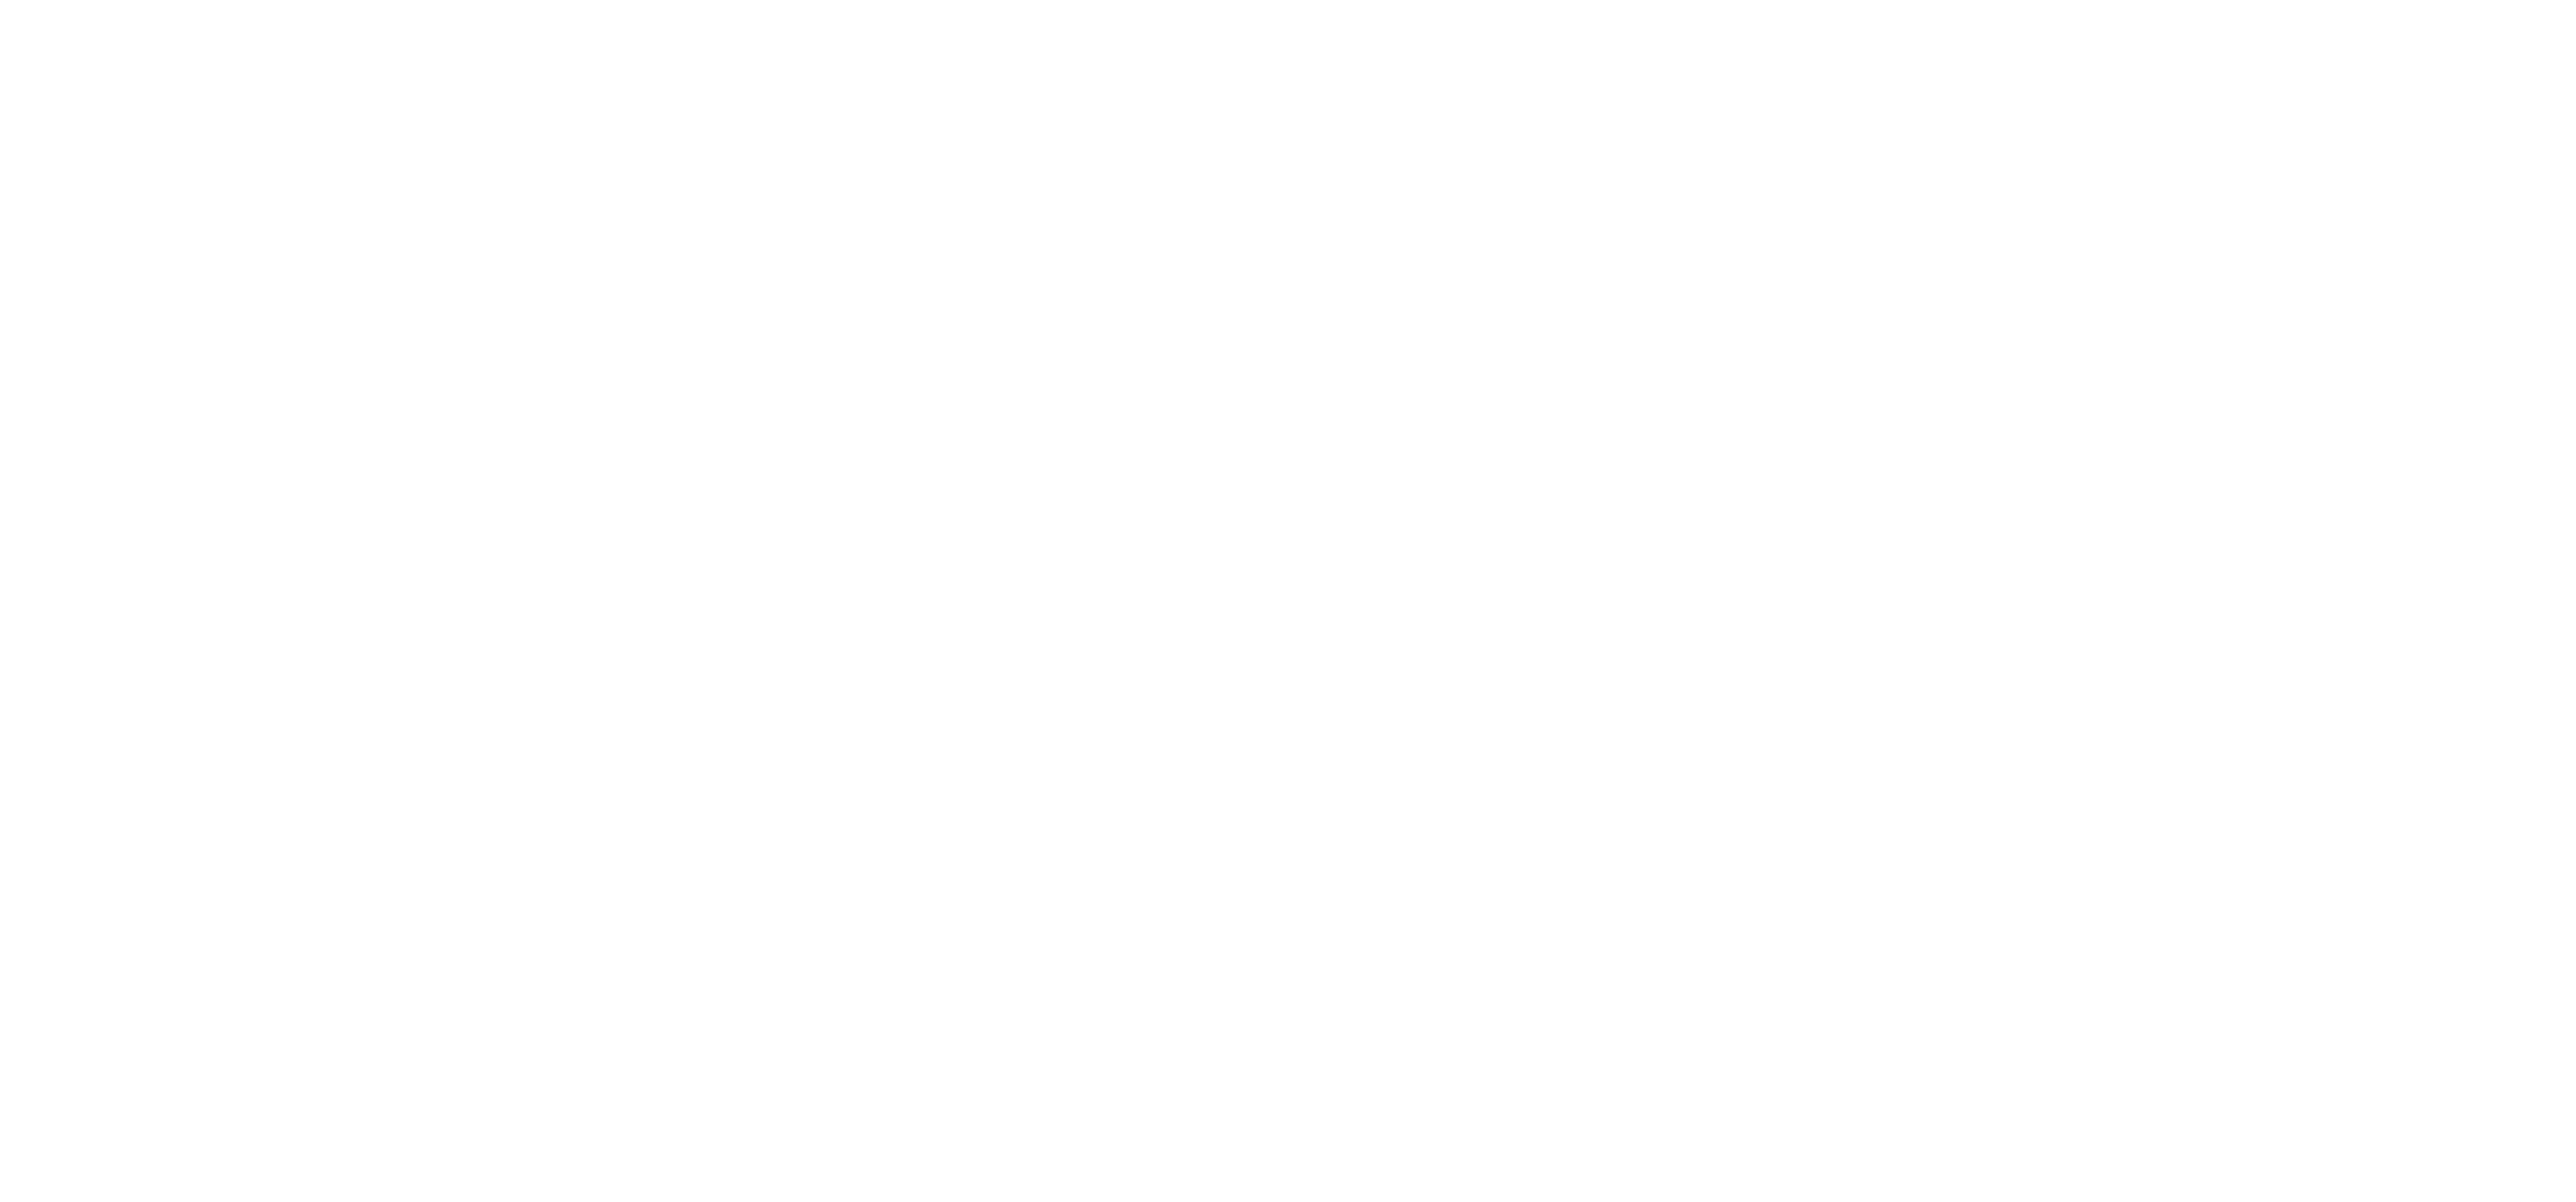

In [22]:
options(repr.plot.width=15, repr.plot.height=7)

p = ggplot(castaway_sorted, aes(x = state.sorted_simple, color = state.sorted_simple))

p = p + geom_point()

p = p + theme(axis.text.x = element_text(angle = 90))

p